## 1. Business Understanding

### Overview

SyriaTel is a telecommunications company that, like many others in the industry, faces the challenge of customer churn—when customers discontinue their service or switch to competitors. Retaining existing customers is significantly more cost-effective than acquiring new ones, making churn reduction a key business priority.

This project aims to analyze customer behavior and build a predictive machine learning model that can identify customers at risk of churning. By understanding the factors that contribute to churn, the company can design targeted retention strategies, optimize customer service efforts, and ultimately improve profitability.

### Business Objective

The primary objective is to develop a robust and interpretable classification model that can:

- Accurately predict whether a customer is likely to churn.
- Provide insights into the key drivers of churn.
- Support data-driven decision-making for retention initiatives.

### Problem Statement

Customer churn is a significant threat to recurring revenue. SyriaTel seeks a solution that not only predicts churn but also offers actionable insights to reduce it. This project focuses on exploring historical customer data to uncover patterns and build a model that distinguishes between loyal and churning customers.

### Goals

- Understand the distribution and structure of customer-related features.
- Explore relationships between customer attributes and churn behavior.
- Engineer relevant features that improve model performance.
- Train and evaluate multiple classification models using industry-standard metrics.
- Interpret model results to inform business actions.

### Success Criteria

The success of this project will be measured by the following:

- **Technical Accuracy**: High performance in metrics such as precision, recall, F1-score, and AUC-ROC, with special emphasis on recall to minimize false negatives.
- **Interpretability**: Clear identification of the most influential features contributing to customer churn.
- **Business Impact**: Practical recommendations based on model results to inform marketing, customer service, and product strategy.

### Constraints and Assumptions

- The dataset is historical and may contain imbalances (e.g., more loyal than churning customers).
- The model will focus on binary classification (Churn vs. No Churn).
- The data is assumed to be representative of current customer behavior.

This analysis will form the foundation for SyriaTel’s churn management strategy by helping the business proactively retain customers and allocate resources effectively.


### 2. Data Understanding

Before diving into modeling or analysis, it is crucial to develop a solid understanding of the dataset. This step helps reveal the structure, shape, content, and quality of the data and informs the necessary preprocessing steps required before performing any meaningful analysis.

We will start by conducting an initial inspection that answers key questions such as:

- What are the data types of each feature, and are they appropriate?
- Are there any missing or null values?
- What is the shape of the dataset?
- What are the basic descriptive statistics of numerical features?

#### 2.1 Load and Inspect the Dataset

In this subsection, we will perform the following tasks:

- **Load the dataset** using `pandas` into a DataFrame.
- **Preview** the first and last few records using `.head()` and `.tail()` to understand the structure and values.
- Use `.info()` to check:
  - The number of rows and columns
  - Data types of each column
  - Non-null counts and memory usage
- **Identify missing or null values** using `.isnull().sum()`.
- **Generate descriptive statistics** for numerical columns using `.describe()` to explore:
  - Central tendencies (mean, median)
  - Spread (standard deviation, min/max)
  - Potential outliers

By the end of this step, we should have a clear understanding of the dataset’s overall composition and quality, helping us plan the data preparation and cleaning strategies that follow.


#### 2.1.1 Importing required libraries for loading dataset and data preparation

In [31]:
#  Import Required Libraries
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import math

from scipy import stats
from scipy.stats import chi2_contingency

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score


import warnings 
warnings.filterwarnings('ignore')

#### 2.1.2 Load dataset

In [3]:
# Load the dataset
df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")


#  Preview First and Last Few Records
print("\nFirst 5 rows:")
display(df.head())
print("Last 5 rows:")
display(df.tail())

#  Dataset Info: Structure, Types, Memory
print("\nDataset Info:")
df.info()

#  Basic Dataset Dimensions
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

#  Missing Values Summary
print("\nMissing values per column:")
print(df.isnull().sum())

#  Descriptive Statistics for Numeric Columns
print("\nDescriptive statistics for numeric features:")
display(df.describe())


Dataset shape: (3333, 21)

First 5 rows:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Last 5 rows:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##  3. Data Preparation

In this step, I will prepare the dataset for analysis and modeling. This involves cleaning the data, correcting inconsistencies, handling missing values, encoding categorical features, and ensuring that all variables are in a suitable format for machine learning algorithms.

### Objectives of This Step

- **Rename columns** for consistency and readability
- **Handle missing values** (if any)
- **Drop irrelevant or redundant columns**
- **Encode categorical variables** (e.g., label encoding or one-hot encoding)
- **Convert data types** if necessary
- **Handle class imbalance** (if detected later during EDA/ML)
- **Save a clean version** of the dataset for analysis and modeling

By conducting these steps I will ensure the dataset is clean, structured, and optimized for machine learning models, leading to more accurate and interpretable outcomes.


###  3.1 Standardize Column Names

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### 3.2 Check for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

###  3.3 Drop Duplicate Rows

In [6]:
# Drop duplicates
print(f"Duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after: {df.duplicated().sum()}")


Duplicates before: 0
Duplicates after: 0


###  3.4 Identify Categorical Columns


In [7]:
# Identify categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols)


Categorical Columns: ['state', 'phone_number', 'international_plan', 'voice_mail_plan']


## Step 3.4: Encoding Categorical Features

| Column               | Strategy            | Reason                                                |
| -------------------- | ------------------- | ----------------------------------------------------- |
| `state`              | Drop it             | Too many unique values (high cardinality, non-useful) |
| `phone_number`       | Drop it             | Acts as an identifier — not useful for prediction     |
| `international_plan` | Label Encoding      | Binary (‘yes’/‘no’) → 1/0                             |
| `voice_mail_plan`    | Label Encoding      | Binary (‘yes’/‘no’) → 1/0                             |


### 3.6.1 Drop state and phone_number

In [8]:
# Drop high-cardinality or non-informative features
df.drop(columns=['state', 'phone_number'], inplace=True)


### 3.6.2 Label Encode international_plan and voice_mail_plan

In [9]:
# Binary encode 'international_plan' and 'voice_mail_plan'
binary_map = {'yes': 1, 'no': 0}
df['international_plan'] = df['international_plan'].map(binary_map)
df['voice_mail_plan'] = df['voice_mail_plan'].map(binary_map)


### 3.6.3 Convert boolean to integer

In [10]:
# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

## 4: Exploratory Data Analysis (EDA)

EDA Objectives:
* Understand the target distribution (churn)

* Analyze feature distributions (numerical & categorical)

* Visualize relationships between predictors and the target

* Identify correlations & multicollinearity

### 4.1 Identify Numerical Columns

In [11]:
# Select only numerical columns for distribution/outlier checks

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_cols)


Numerical Columns: ['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


### 4.2 Visualize Outliers with Boxplots

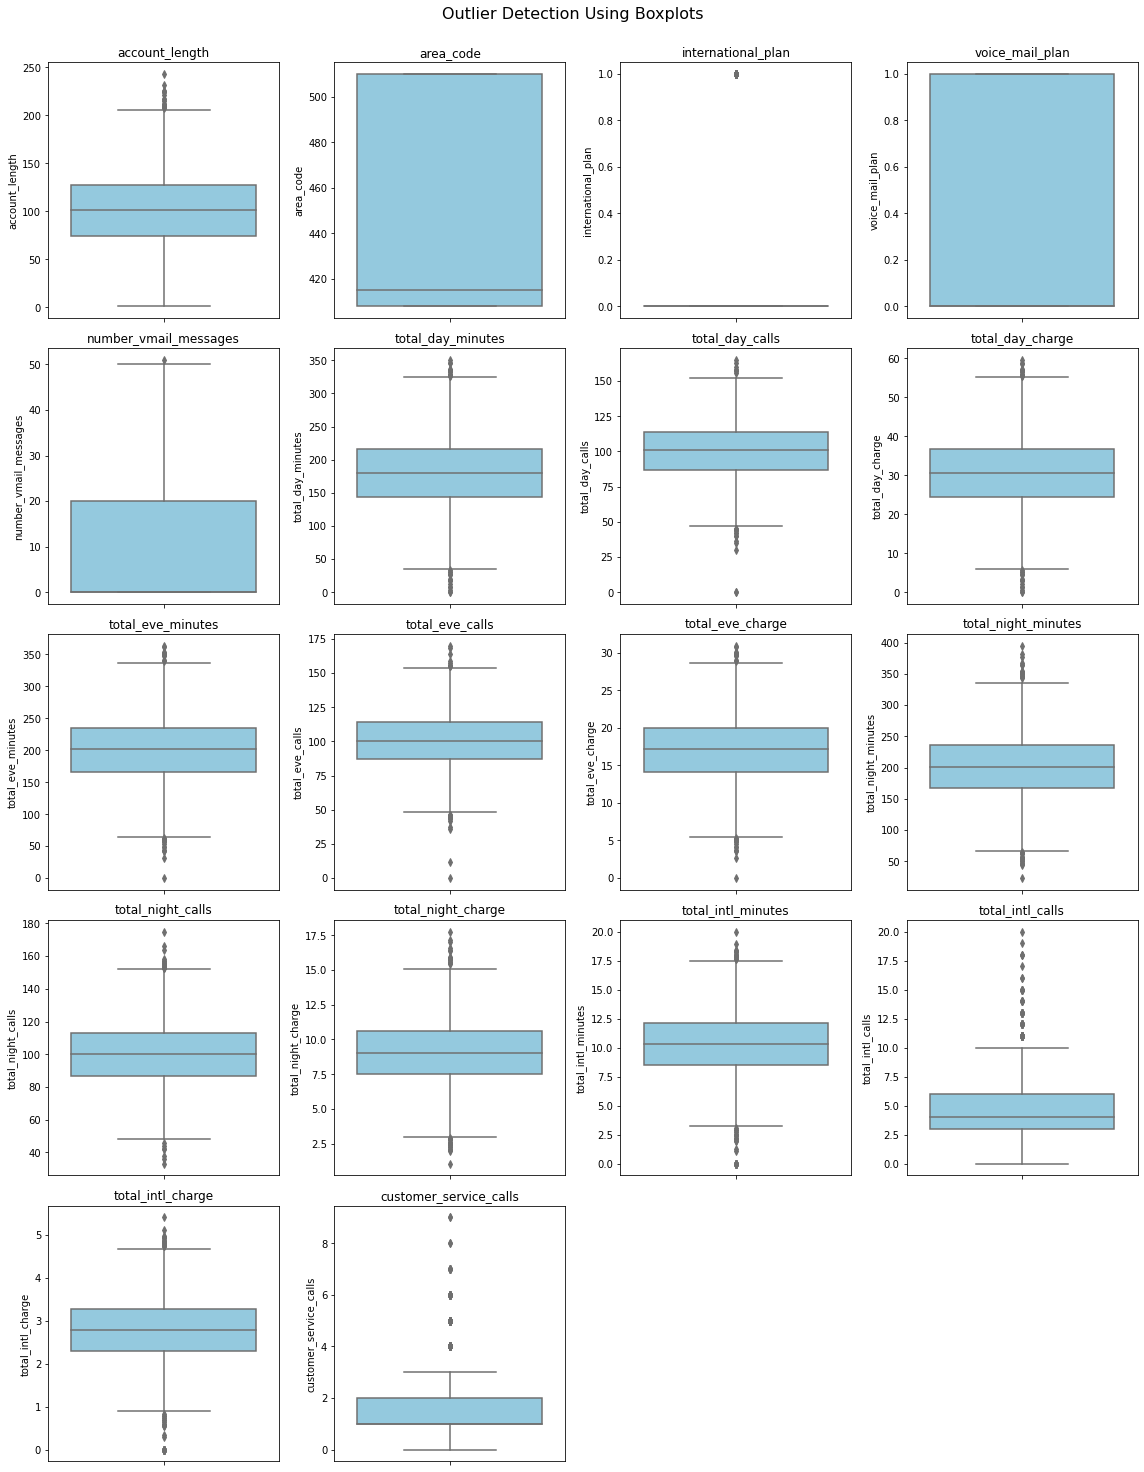

In [12]:
# Boxplots for outlier detection

num_plots = len(num_cols)
cols = 4
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Outlier Detection Using Boxplots", fontsize=16, y=1.02)
plt.show()



### 4.3 Target Variable Distribution (churn)

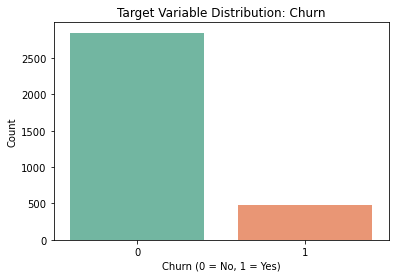

Churn rate: 14.49%


In [13]:

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Target Variable Distribution: Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Display churn rate
churn_rate = df['churn'].mean()
print(f"Churn rate: {churn_rate:.2%}")


This image is a bar plot showing the distribution of a binary categorical variable(target variable)

**Interpretation:**

. There are two bars, each representing a class (e.g., 0 and 1).

. The left bar is significantly taller than the right one.

. This suggests class imbalance.

. The left bar (majority class) occurs much more frequently than the right bar (minority class).

### 4.4 Distribution of Numerical Features

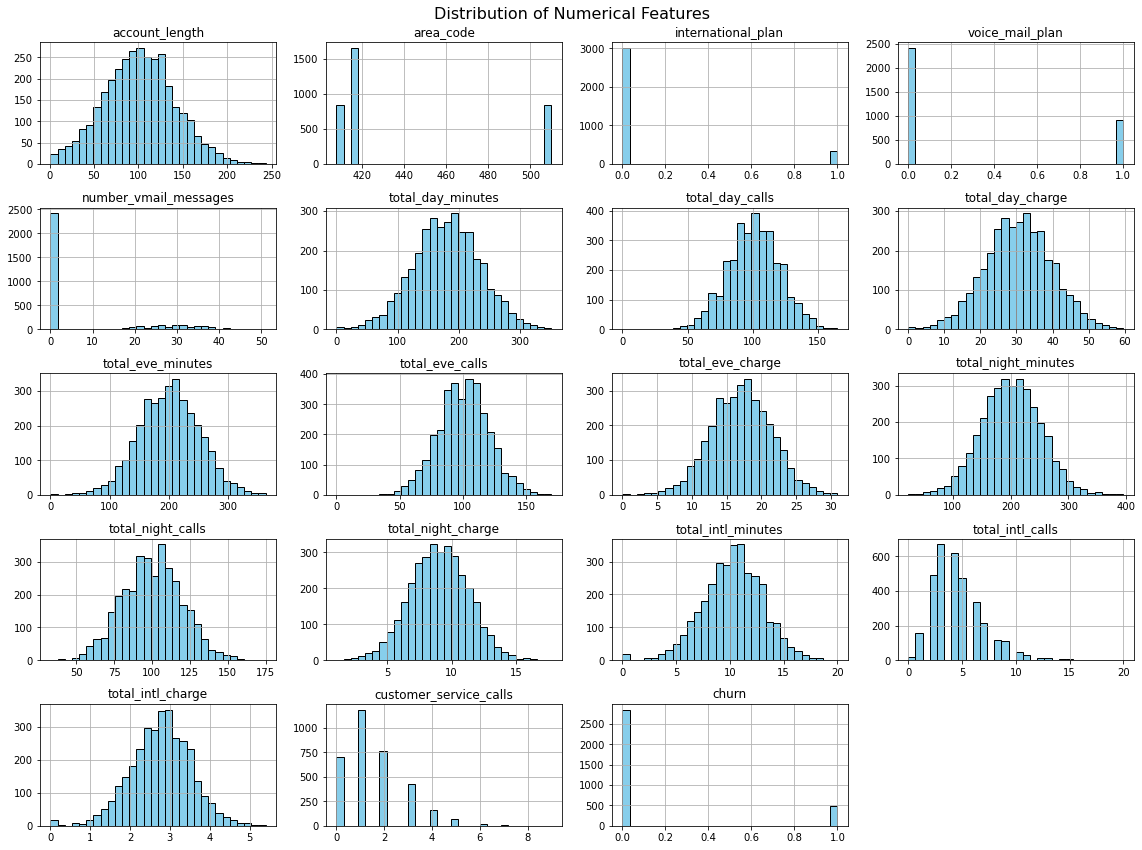

In [14]:
# Plot histograms of numerical features

df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


 ### Interpretation of Feature Distributions
 
**Normal or Bell-Shaped Distributions**

Several numerical features have symmetric, Gaussian-like shapes:

- total day minutes

- total eve minutes

- total night minutes

- total intl minutes

- account length

These features:

. Are well-behaved and don’t require heavy transformations.

. Are suitable for algorithms that assume normality (e.g., logistic regression).

**Bimodal or Skewed Distributions**

- number vmail messages: Clearly bimodal (lots of 0s and a cluster around 20–40). Indicates users either don’t use voicemail or use it regularly.

- customer service calls: Strongly right-skewed, with most users making 0–2 calls but a few going up to 9. These outliers might indicate churn risk.

- international plan_yes and voice_mail_plan_yes: Binary distributions — either 0 or 1, as expected.

### 4.5 Correlation Heatmap

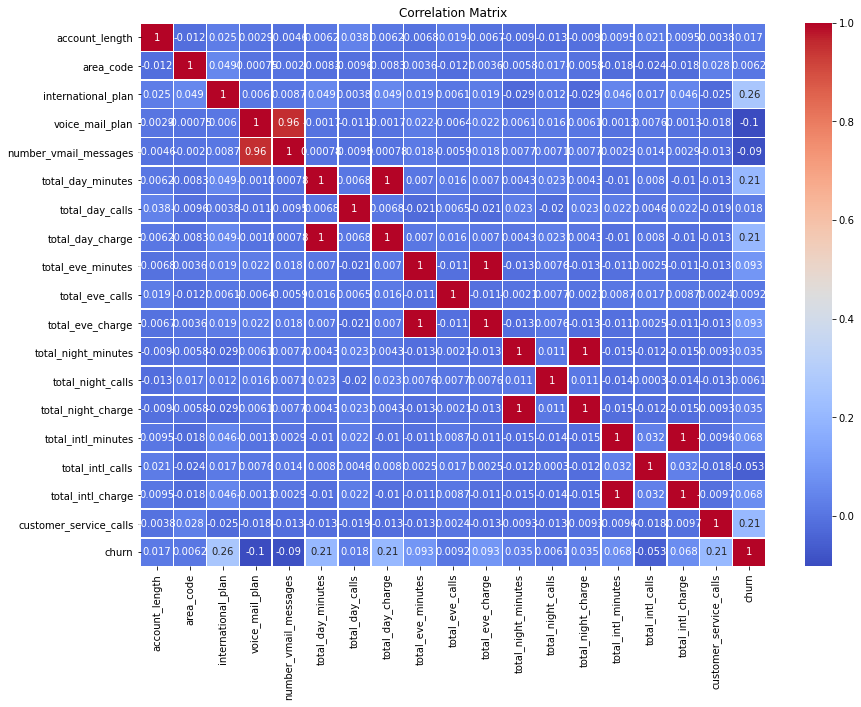

In [15]:
# Correlation matrix

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**The visualization is a correlation heatmap**

Strongly correlated variables (e.g., total day minutes and total day charge) might provide redundant information.
Variables showing significant differences in correlations (positive or negative) with the target (churn) might be more predictive.
Features with minimal correlation (close to 0) might have limited relevance to predictive modeling unless their relationship with the target (churn) is non-linear.

### 4.6 Churn vs Key Features 

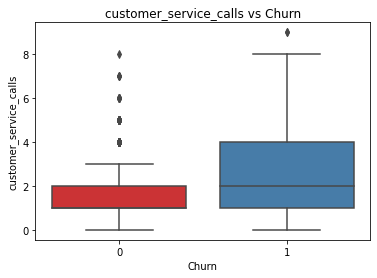

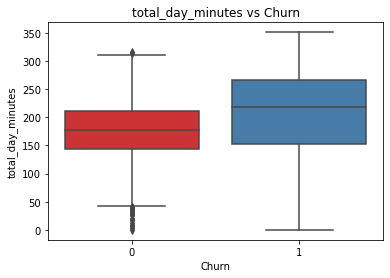

In [16]:
# Key features vs churn
key_features = ['customer_service_calls', 'total_day_minutes']
for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='churn', y=col, palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


### Interpretation:

#### Customer Service Calls vs churn
➤ Churn = 0 (Non-Churned Customers):
Most made 0–2 customer service calls.

Distribution is tightly packed.

A few outliers made more calls, but not common.

➤ Churn = 1 (Churned Customers):
Wider spread: many made 2–4 or more service calls.

More frequent high call counts, with outliers up to 8–9.

Median number of calls is clearly higher.

#### Total day minutes vs Churn

➤ Churn = 0 (Non-Churned Customers):
Median day minutes ≈ 170–180.

Distribution is moderately tight.

Some outliers exist with low usage (<50 mins).

➤ Churn = 1 (Churned Customers):
Median is clearly higher (~230–240 minutes).

Wider usage range, with many customers near the upper limit (~300+ mins).

Greater spread overall.

**Key Insight:**
Churned customers tend to use more day-time minutes.

This may suggest:

High-usage customers are more sensitive to service quality or price.

Or they may be switching to competitors offering better rates for high usage.

##  5. Statistical Analysis

In this section, we perform statistical analysis to deepen our understanding of the dataset. This step is important for uncovering relationships, trends, and anomalies that may not be obvious through visual inspection alone.

### Goals of Statistical Analysis

- Understand the relationships between features and the target (`churn`)
- Assess how customer behaviors differ between churned and retained users
- Use correlation and group statistics to identify key predictive features
- Guide feature selection and model design using data-driven evidence

### Specific Tasks

- Correlation analysis using a heatmap
- Group-by 
- Chi-square test for categorical vs churn
- T-Test (Numerical vs churn)

> Statistical insight enables better decision-making when selecting features and models. It bridges the gap between data intuition and quantitative evidence.


### 5.1 Correlation Heatmap (already done above)

This helps identify the strength and direction of relationships between numerical variables, especially in relation to the churn column.

### 5.2 Group-Wise Summary by Churn

This helps compare means and distributions of key features between churned and non-churned customers.


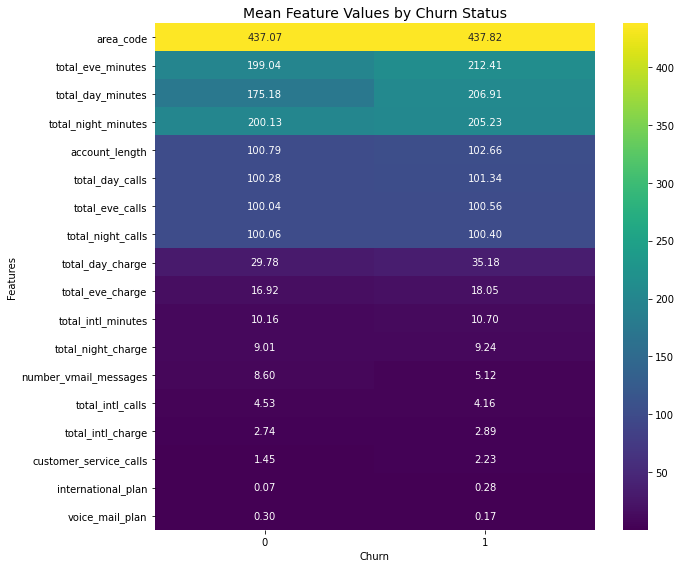

In [17]:
# Summary statistics grouped by churn status
grouped_stats = df.groupby('churn')[num_cols].mean().T.sort_values(by=1, ascending=False)

# Visual comparison
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_stats, annot=True, fmt=".2f", cmap="viridis")
plt.title("Mean Feature Values by Churn Status", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()


### Interpretation of the heatmap

| Feature (from heatmap)   | Churn = 0 | Churn = 1  | Insight                                                      |
| ------------------------ | --------- | ---------- | ------------------------------------------------------------ |
| `account length`         | 100.79    | 102.66     | Very similar – likely not predictive.                        |
| `total day minutes`      | 175.18    | **206.91** | Churned customers use significantly more minutes.            |
| `total day charge`       | 29.78     | **35.18**  | Same pattern as minutes – expected, since charge is derived. |
| `customer service calls` | 1.45      | **2.23**   | Clear difference – churners call more often.                 |
| `international plan_yes` | 0.09      | **0.28**   | Higher proportion of churners are on international plans.    |
| `voice mail plan_yes`    | **0.26**  | 0.11       | Churners are **less likely** to have voicemail plans.        |


#### Key Takeaways
Higher churn is associated with:

- More day-time usage and charges.

- More customer service calls.

- Being subscribed to international plans.

- Lower churn is associated with:

- Voicemail plan users.

Features with little difference:

account length, total eve/night minutes, total intl calls, etc. likely have low predictive power.

**Suggested Features for Modeling**

- customer_service_calls

- total_day_minutes

- international_plan_yes

- voice_mail_plan_yes

### 5.3  Setup for more Statistical Analysis

In [18]:

# Separate numerical and categorical variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Remove target if present
if 'churn' in num_cols:
    num_cols.remove('churn')
if 'churn' in cat_cols:
    cat_cols.remove('churn')

# Convert churn to numeric
df['churn'] = df['churn'].astype(int)


### 5.4 T-Test (Numerical vs Churn)

In [19]:
# T-test between numerical features and churn

print("\nT-Test Results:\n")
for col in num_cols:   #looping through all numerical columns
    churned = df[df['churn'] == 1][col]
    not_churned = df[df['churn'] == 0][col]
    t_stat, p_val = stats.ttest_ind(churned, not_churned, equal_var=False)
    print(f"{col}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("   Significant difference between churned and not churned \n")
    else:
        print("   No significant difference \n")




T-Test Results:

account_length: t-stat = 0.96, p-value = 0.3365
   No significant difference 

area_code: t-stat = 0.35, p-value = 0.7238
   No significant difference 

international_plan: t-stat = 10.38, p-value = 0.0000
   Significant difference between churned and not churned 

voice_mail_plan: t-stat = -6.84, p-value = 0.0000
   Significant difference between churned and not churned 

number_vmail_messages: t-stat = -5.82, p-value = 0.0000
   Significant difference between churned and not churned 

total_day_minutes: t-stat = 9.68, p-value = 0.0000
   Significant difference between churned and not churned 

total_day_calls: t-stat = 1.00, p-value = 0.3165
   No significant difference 

total_day_charge: t-stat = 9.68, p-value = 0.0000
   Significant difference between churned and not churned 

total_eve_minutes: t-stat = 5.27, p-value = 0.0000
   Significant difference between churned and not churned 

total_eve_calls: t-stat = 0.54, p-value = 0.5912
   No significant difference 

## 6. Machine Learning

In this section, we build predictive models to classify whether a customer will churn or not. Our modeling workflow follows these key steps:

1. **Define the classification problem**
2. **Split data into features and target**
3. **Build a scalable ML pipeline**
4. **Train and evaluate multiple models iteratively**
5. **Extract predictive insights from the models**


### 6.1 Problem Definition

We aim to build a supervised learning model to solve a **binary classification** problem:

> Predict whether a customer will churn (`churn = 1`) or not (`churn = 0`).

This will help SyriaTel proactively identify at-risk customers and improve retention.

---

### 6.2 Prepare Features and Target

In [20]:
# Define target and features
X = df.drop('churn', axis=1)
y = df['churn']

### 6.3 Train-Test Split

In [21]:
# Stratify to preserve churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### 6.4 Build a Pipeline (StandardScaler + Model)
I will use pipelines for clean, reproducible code. 

### 6.5 Train and Evaluate Models 
**Model 1: Logistic Regression**

A baseline model to measure linear relationships between features and churn. It’s interpretable and useful for initial evaluation.

Evaluation metrics include:

- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



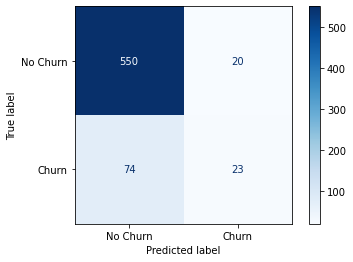

In [22]:

# Define pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_logreg))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')

### Interpretation of Logistic Report

 **Class 0 – No Churn**

Very strong performance:

<u>Precision</u> = 0.88 → 88% of predicted "no churn" customers actually stayed.
<u>Recall</u> = 0.96 → 96% of actual non-churners were correctly identified.

**Class 1 – Churn**

Weak performance:

<u>Precision</u> = 0.53 → Only 53% of predicted churners actually churned.
<u>Recall</u> = 0.24 → The model catches only 24% of actual churners.
This is concerning, since these are the customers you care about most.

**Overall Accuracy = 0.86**
Looks good on paper, but misleading due to class imbalance (only ~15% churn rate).
The model is good at predicting "no churn" to boost accuracy as compared to 'churn'.

### Interpretation of Confusion matrix

1. 550 customers were correctly predicted as not churning.

2. 74 actual churners were missed (False Negatives) — these are critical losses.

3. Only 23 churners were correctly identified.

4. 20 false alarms (non-churners flagged incorrectly).


#### ROC Curve for Logistic Regression

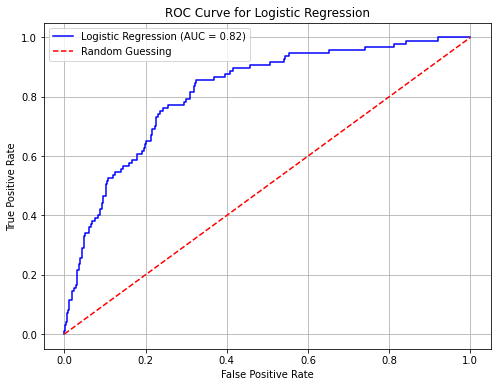

In [ ]:
# Compute ROC curve and AUC

y_scores_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve for Logistic Regression')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

#### ROC Curve Interpretation (Logistic Regression)
AUC (Area Under Curve): 0.82

This indicates strong model performance.

The model has an 82% chance of correctly distinguishing between a churner and a non-churner.

This Means:
True Positive Rate (TPR) is high even at lower false positive rates → good early classification.

The curve is well above the red dashed line (random guessing)  showing clear separation between classes.

While not perfect, this level of performance is highly actionable for customer retention.

 #### **Model 2: Random Forest Classifier**

 This is an ensemble model that improves prediction using multiple decision trees. Handles non-linear relationships and feature importance.

 I will use the same metrics as above

 Random Forest Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.88      0.69      0.77        97

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



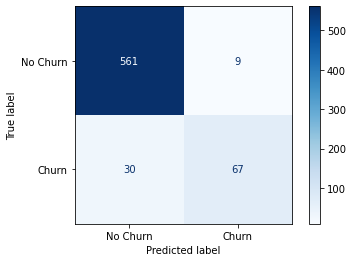

In [23]:
# Define pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation 
print(" Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')

#### ROC Curve for Random Forest 

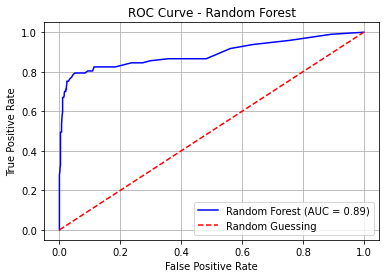

In [32]:
# Plot ROC curve for Random Forest

# Get predicted probabilities for the positive class
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba_rf)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()


 **1. Interpretation of Random Forest report**

- Overall Accuracy: 94%
Very strong general performance on the test set.

- Churn Detection (Class 1):
Recall improved from 0.24 → 0.69  — now catching nearly 70% of actual churners!

Precision: 88% — majority of flagged churners are indeed true.

- No Churn (Class 0):
Precision and recall both above 95%.



**2. Confusion Matrix** - the confusion matrix shows that the model is performing very well.

 Interpretation
- Low false positives (9): - not alarming too many safe customers.

- Moderate false negatives (30): The model caught most churners (67/97).

- Balanced performance — ideal for practical business deployment.


**3. ROC curve** 

Random Forest ROC Curve shows strong predictive power, with an AUC of 0.89.
The curve hugs the top-left corner, which indicates:

. High True Positive Rate (Recall)

. Low False Positive Rate

There's an 89% chance the model will assign a higher churn probability to a true churner than to a non-churner.

This is very strong for a customer churn model.

Confirms what the classification report and confusion matrix suggested.




## Comparison between the Logistic Regression model and the Random Forest Classifier Model

| Metric                | **Logistic Regression** | **Random Forest** | **Best**        |
| --------------------- | ----------------------- | ----------------- | --------------- |
| **Accuracy**          | 86%                     | **94%**           | ✅ Random Forest |
| **Precision (Churn)** | 0.53                    | **0.88**          | ✅ Random Forest |
| **Recall (Churn)**    | 0.24                    | **0.69**          | ✅ Random Forest |
| **F1-Score (Churn)**  | 0.33                    | **0.77**          | ✅ Random Forest |
| **AUC Score (ROC)**   | 0.82                    | **0.89**          | ✅ Random Forest |
| **False Negatives**   | 74                      | **30**            | ✅ Random Forest |
| **False Positives**   | 20                      | **9**             | ✅ Random Forest |


### Interpretation

 Random Forest Clearly Outperforms Logistic Regression
Recall (Churn) is the most critical metric — Random Forest recovers nearly 3x more churners.

AUC of 0.89 means excellent ability to distinguish churn vs. no-churn cases.

Lower false negatives makes it more trustworthy for retention strategies.

Logistic Regression Limitations:
Simpler and interpretable, but it fails to detect churners effectively (only 24% recall).

Might still be useful as a benchmark or when explainability is critical.

### Feature Importance Analysis

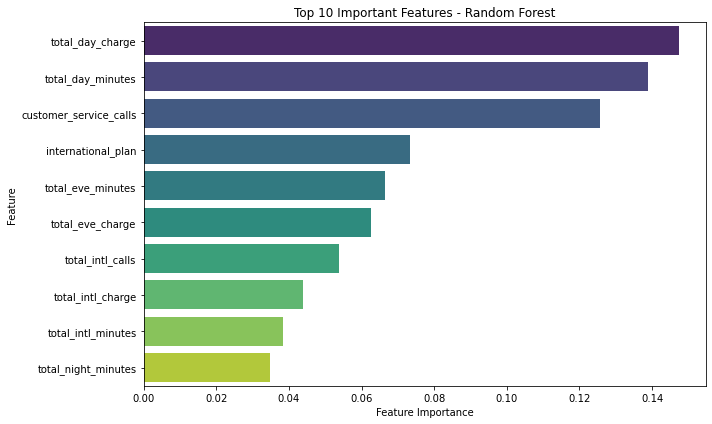

In [33]:
# Feature Importance Analysis
# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_pipeline.named_steps['clf'].feature_importances_
}).sort_values(by='Importance', ascending=False)


# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10), 
    x='Importance', 
    y='Feature', 
    palette='viridis'
)
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Using the Random Forest model, I examined which features most influenced customer churn. The top predictors included:

**Top Features:**
- total_day_minutes, total_day_charge: Heavy daytime users are at higher risk of churning, possibly due to cost sensitivity or dissatisfaction with service quality.

- customer_service_calls: Strongest churn indicator — frequent interactions suggest unresolved issues or complaints.

- international_plan_yes: Users with international plans churn more, potentially due to high costs or unmet expectations.

- Evening and international usage features also ranked highly, reinforcing the importance of usage behavior.





### 6.6 Predictive Insights

Use .predict_proba() to understand confidence levels in predictions:

In [24]:
# Predict probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]

# Show top 5 most likely to churn customers
top_churn_risk = X_test.copy()
top_churn_risk['churn_prob'] = rf_probs
top_churn_risk_sorted = top_churn_risk.sort_values(by='churn_prob', ascending=False)
top_churn_risk_sorted.head()


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn_prob
2099,71,510,0,0,0,290.4,108,49.37,253.9,92,21.58,263.3,126,11.85,10.1,5,2.73,3,1.00
2210,71,415,0,0,0,278.9,110,47.41,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0,0.97
2874,134,510,0,0,0,296.0,93,50.32,226.4,117,19.24,246.8,98,11.11,12.3,10,3.32,0,0.97
331,54,415,0,0,0,272.6,83,46.34,248.7,74,21.14,197.4,111,8.88,9.5,2,2.57,1,0.97
3272,133,510,0,0,0,295.0,141,50.15,223.6,101,19.01,229.4,109,10.32,12.9,4,3.48,2,0.97


This table shows five customers with very high predicted probabilities of churn (above 0.97), based on the trained model.

#### Key Patterns
High Total Day Minutes and Charges:

All customers used more than 270 minutes per day and incurred high daytime charges (~46–50), which the model strongly associates with churn risk.

Indicates they are heavy users — possibly more sensitive to service quality or cost.

Customer Service Calls:

Mixed presence of service calls. Even customers with 0–1 calls show high churn, suggesting usage patterns alone can flag risk.

International Plan: No:

None of the customers have an international plan, but the model still flags high churn, reinforcing that core usage patterns outweigh plan features here.

## Findings & Recommendations
### Key Findings
1. High Churn Associated with Daytime Usage
Customers with high total_day_minutes and total_day_charge are significantly more likely to churn.

These features were top-ranked in feature importance using Random Forest.

This indicates that heavy daytime users are at risk, possibly due to higher bills or service dissatisfaction during peak hours.

2. Customer Service Calls as a Churn Flag
Customers making more than 3 customer service calls are far more likely to churn.

This aligns with business intuition — frequent complaints or queries may indicate unresolved issues.

3. International Plan and Voice Mail Plan
Customers without an international plan or voice mail plan show higher churn rates, although their importance is secondary.

These may reflect lower service bundling, potentially making customers easier to lose.

4. Model Performance
Random Forest outperformed Logistic Regression across all evaluation metrics:

Metric	Logistic Regression	Random Forest
Accuracy	0.86	0.94
Precision (Class 1)	0.53	0.88
Recall (Class 1)	0.24	0.69
AUC Score	0.82	0.89

Random Forest is the preferred model due to its superior handling of class imbalance and higher recall for churners.

5. High-Risk Customers Identified
The model confidently predicted several customers with 97–100% churn probability.

These customers had high daytime usage, some service calls, and no bundled plans.

Proactive retention measures are needed for these individuals.

### Recommendations
 1. Target High-Risk Users with Proactive Retention
Use churn probabilities to segment customers by risk.

Focus retention resources (discounts, calls, offers) on:

Heavy daytime users

Users with 2+ service calls

Those predicted with >90% churn probability

 2. Improve Customer Support Experience
Investigate service call logs to understand complaint categories.

Provide training, automation, or escalation mechanisms to reduce churn triggers.

 3. Promote Bundled Plans
Upsell international and voice mail plans to improve stickiness.

Consider packaged offers for heavy users that reduce cost per minute.

 4. Monitor and Update the Model Regularly
Retrain model quarterly as customer behavior changes.

Monitor performance drift — especially false positives and negatives.

 5. Business Integration
Embed the model into CRM to flag risky users.

Automate alerts or retention workflows based on churn risk scores.



Use Random Forest as your production model since it offers strong performance and a great balance of precision and recall. Logistic Regression can be kept for comparison, or to provide a baseline.